### Contour Properties

aspect_ratio 1.14
extent 0.33
solidity 0.48
equi_diameter 611.05
Orientation x:633.45068359375 y:585.34, 712.08, 90.09
max_val 255.00, min_val 0.00, min_loc (803, 149), max_loc (802, 147)
mean_val (2.9399084590608577, 0.0, 0.0, 0.0)
leftmost (np.int32(187), np.int32(315))
rightmost (np.int32(1186), np.int32(585))


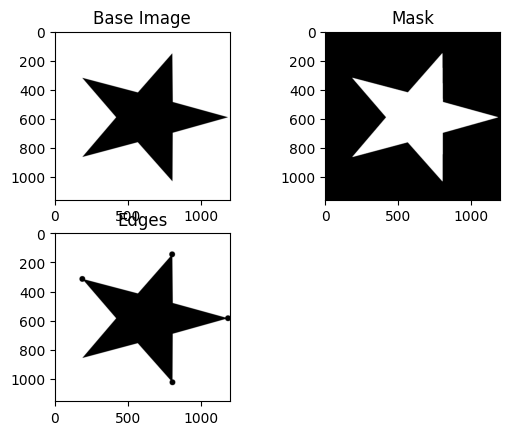

In [26]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Загрузка изображения
img = cv.imread('star.png', cv.IMREAD_GRAYSCALE)
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"

# Поиск контуров
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]

# Aspect Ratio
# It is the ratio of width to height of bounding rect of the object.

x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h
print(f"aspect_ratio {aspect_ratio:.2f}")

# Extent
# Extent is the ratio of contour area to bounding rectangle area.

area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print(f"extent {extent:.2f}")

# Solidity
# Solidity is the ratio of contour area to its convex hull area.

area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area
print(f"solidity {solidity:.2f}")

# Equivalent Diameter
# Equivalent Diameter is the diameter of the circle whose area is same as the contour area.

area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(f"equi_diameter {equi_diameter:.2f}")

# Orientation
# Orientation is the angle at which object is directed. Following method also gives the Major Axis and Minor Axis lengths.

(x,y),(MA,ma),angle = cv.fitEllipse(cnt)
print(f"Orientation x:{x} y:{y:.2f}, {MA:.2f}, {angle:.2f}")

# Mask and Pixel Points
# In some cases, we may need all the points which comprises that object. It can be done as follows:

mask = np.zeros(img.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv.findNonZero(mask)


# Maximum Value, Minimum Value and their locations
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(img,mask = mask)
print(f"max_val {max_val:.2f}, min_val {min_val:.2f}, min_loc {min_loc}, max_loc {max_loc}")

# Mean Color or Mean Intensity

mean_val = cv.mean(img,mask = mask)
print(f"mean_val {mean_val}")

# Extreme Points
# Extreme Points means topmost, bottommost, rightmost and leftmost points of the object.

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
print(f"leftmost {leftmost}")
print(f"rightmost {rightmost}")

edges = img.copy()

image = cv.circle(edges, leftmost, radius=20, color=(0, 0, 255), thickness=-1)
image = cv.circle(edges, rightmost, radius=20, color=(0, 0, 255), thickness=-1)
image = cv.circle(edges, topmost, radius=20, color=(0, 0, 255), thickness=-1)
image = cv.circle(edges, bottommost, radius=20, color=(0, 0, 255), thickness=-1)



plt.subplot(221),plt.imshow(img,cmap = 'gray'),plt.title('Base Image')
plt.subplot(222),plt.imshow(mask,cmap = 'gray'),plt.title('Mask')
plt.subplot(223),plt.imshow(edges,cmap = 'gray'),plt.title('Edges')
plt.show()





### Contours : More Functions

shortest distance between a point (500,500) in the image and a contour {98.76234100101111}
check if point (500,500) is inside or outside or on the contour (it returns +1, -1, 0 respectively)  {1.0}
check if point (100,500) is inside or outside or on the contour (it returns +1, -1, 0 respectively)  {-1.0}


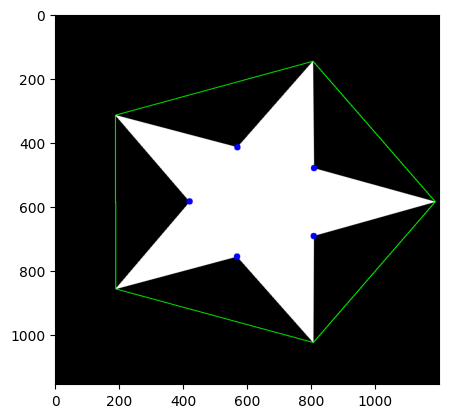

In [49]:
import cv2 as cv
import numpy as np
img = cv.imread('star.png')
assert img is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[0]
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img,start,end,[0,255,0],2)
    cv.circle(img,far,10,[0,0,255],-1)

dist = cv.pointPolygonTest(cnt,(500,500),True)
print("shortest distance between a point (500,500) in the image and a contour", {dist})
dist = cv.pointPolygonTest(cnt,(500,500),False)
print("check if point (500,500) is inside or outside or on the contour (it returns +1, -1, 0 respectively) ", {dist})
dist = cv.pointPolygonTest(cnt,(100,500),False)
print("check if point (100,500) is inside or outside or on the contour (it returns +1, -1, 0 respectively) ", {dist})

plt.imshow(img,cmap = 'gray')
plt.show()

127.0


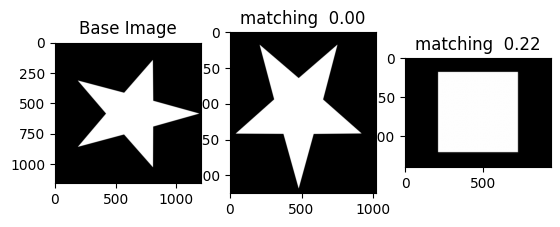

In [57]:
# Match Shapes
# OpenCV comes with a function cv.matchShapes() which enables us to compare two shapes, or two contours and returns a metric showing the similarity.

# The lower the result, the better match it is. It is calculated based on the hu-moment values. Different measurement methods are explained in the docs.

import cv2 as cv
import numpy as np
img1 = cv.imread('star.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('star_2.png', cv.IMREAD_GRAYSCALE)
img3 = cv.imread('star_3.png', cv.IMREAD_GRAYSCALE)
img3 = cv.bitwise_not(img3)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
assert img3 is not None, "file could not be read, check with os.path.exists()"


ret, thresh = cv.threshold(img1, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]


ret, thresh2 = cv.threshold(img2, 127, 255,0)
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]


ret, thresh3 = cv.threshold(img3, 127, 255,0)
contours,hierarchy = cv.findContours(thresh3,2,1)
cnt3 = contours[0]


ret_1 = cv.matchShapes(cnt1,cnt2,1,0.0)
ret_2 = cv.matchShapes(cnt1,cnt3,1,0.0)
print( ret )

plt.subplot(131),plt.imshow(img1,cmap = 'gray'),plt.title(f'Base Image')
plt.subplot(132),plt.imshow(img2,cmap = 'gray'),plt.title(f'matching  {ret_1:.2f}')
plt.subplot(133),plt.imshow(img3,cmap = 'gray'),plt.title(f'matching  {ret_2:.2f}')
plt.show()




Template Matching

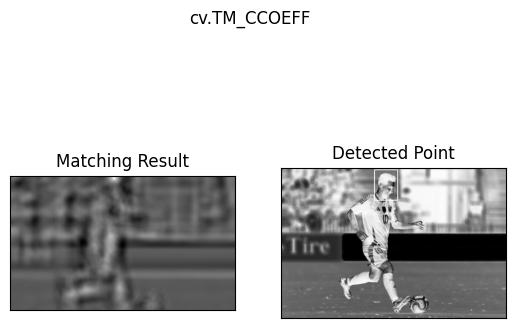

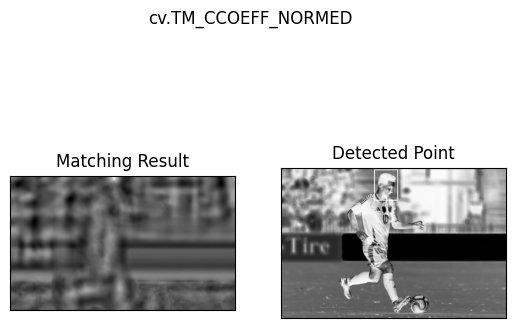

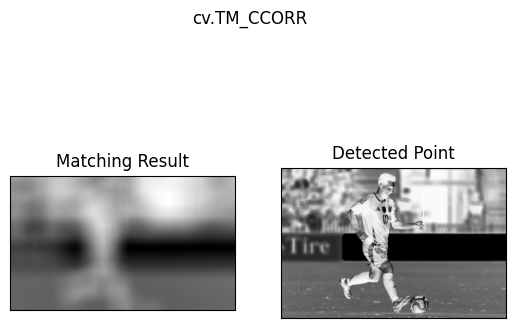

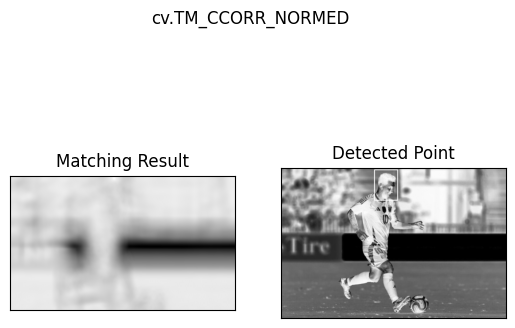

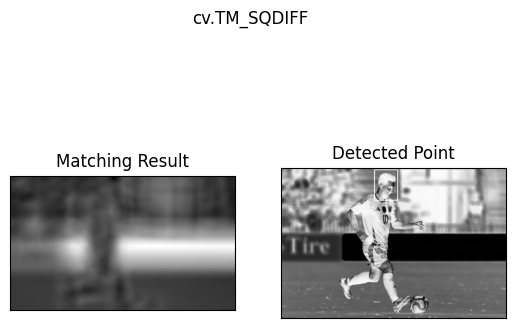

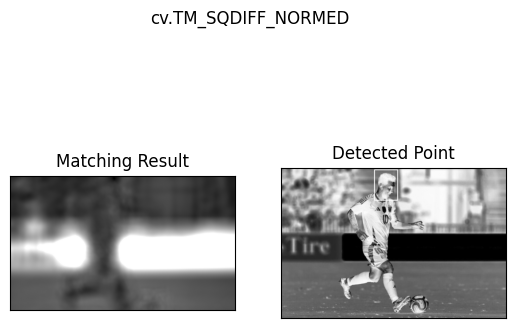

In [59]:
# Here, as an example, we will search for Messi's face in his photo.

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('messi.png', cv.IMREAD_GRAYSCALE)
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('template.png', cv.IMREAD_GRAYSCALE)
template = cv.bitwise_not(template)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()




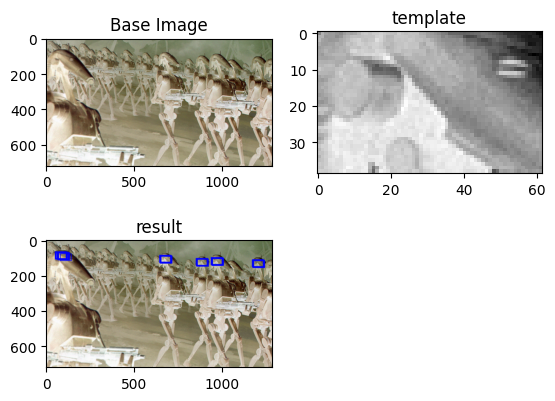

In [80]:
# Template Matching with Multiple Objects

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv.imread('droids.png')
img_rgb = cv.bitwise_not(img_rgb)
base_image = img_rgb.copy()

assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

template = cv.imread('droid_face.png', cv.IMREAD_GRAYSCALE)
template = cv.bitwise_not(template)

assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.79
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('res.png',img_rgb)

plt.subplot(221),plt.imshow(base_image,cmap = 'gray'),plt.title(f'Base Image')
plt.subplot(222),plt.imshow(template,cmap = 'gray'),plt.title(f'template')
plt.subplot(223),plt.imshow(img_rgb,cmap = 'gray'),plt.title(f'result')
plt.show()